In [ ]:
import pandas as pd

df_prep = df1.copy()

# Load raw dataset to get correct TARGET column
raw = pd.read_csv("application_train.csv")

# Attach correct TARGET column
df_prep['TARGET'] = raw['TARGET']

# Save fixed dataset
df_prep.to_csv("feature_engineered_application_train_fixed.csv", index=False)

print("✅ feature_engineered_application_train_fixed.csv created successfully!")
print("Shape:", df_prep.shape)
print("\nTARGET distribution:")
print(df_prep['TARGET'].value_counts(normalize=True))

✅ feature_engineered_application_train_fixed.csv created successfully!
Shape: (307511, 178)

TARGET distribution:
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


✅ Dataset loaded successfully!
Shape: (307511, 178)

TARGET distribution:
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

Train TARGET distribution:
 TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

Test TARGET distribution:
 TARGET
0    0.919272
1    0.080728
Name: proportion, dtype: float64

✅ Features scaled successfully!


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 177)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        22,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 177)            │        22,833 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,385 (259.32 KB)

 Trainable params: 66,385 (259.32 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
961/961 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.4669 - val_loss: 0.3286
Epoch 2/30
961/961 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2786 - val_loss: 0.2717
Epoch 3/30
961/961 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2405 - val_loss: 0.2392
Epoch 4/30
961/961 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2170 - val_loss: 0.2163
Epoch 5/30
961/961 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2112 - val_loss: 0.2045
Epoch 6/30
961/961 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1950 - val_loss: 0.1902
Epoch 7/30
961/961 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.1899 - val_loss: 0.1842
Epoch 8/30
961/961 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1804 - val_loss: 0.1862
Epoch 9/30
961/961 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.1735 - val_loss: 0.1738
Epoch 10/30
961/961 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1665 - val_loss: 0.1672
Epoch 11/30
961/961 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.1626 - val_loss: 0.1580
Epoch 12/30
961/961 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step

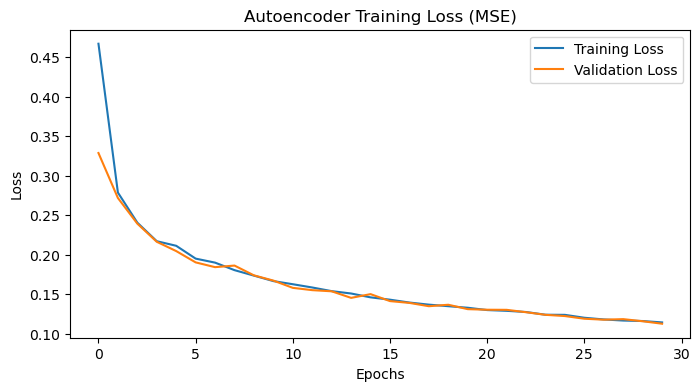

7688/7688 ━━━━━━━━━━━━━━━━━━━━ 5s 620us/step
1922/1922 ━━━━━━━━━━━━━━━━━━━━ 1s 658us/step

✅ Encoded features created successfully!
Train encoded shape: (246008, 33)
Test encoded shape: (61503, 33)

TARGET distribution (train):
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

💾 Saved successfully:
→ autoencoder_train_features.csv
→ autoencoder_test_features.csv


In [7]:
# ============================================================
# STEP 1️⃣: IMPORT LIBRARIES
# ============================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt


# ============================================================
# STEP 2️⃣: LOAD FIXED DATASET
# ============================================================

df1 = pd.read_csv("feature_engineered_application_train_fixed.csv")

print("✅ Dataset loaded successfully!")
print("Shape:", df1.shape)
print("\nTARGET distribution:")
print(df1['TARGET'].value_counts(normalize=True))

# Separate features and target
X = df1.drop(columns=['TARGET'])
y = df1['TARGET']


# ============================================================
# STEP 3️⃣: TRAIN-TEST SPLIT (STRATIFIED)
# ============================================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,   # Keeps same target ratio in train and test
    random_state=42
)

print("\nTrain TARGET distribution:\n", y_train.value_counts(normalize=True))
print("\nTest TARGET distribution:\n", y_test.value_counts(normalize=True))


# ============================================================
# STEP 4️⃣: FEATURE SCALING
# ============================================================

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✅ Features scaled successfully!")


# ============================================================
# STEP 5️⃣: DEFINE AUTOENCODER MODEL
# ============================================================

input_dim = X_train_scaled.shape[1]     # number of input features
encoding_dim = 32                       # latent representation size

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
bottleneck = Dense(encoding_dim, activation='relu', name="bottleneck")(encoded)

# Decoder
decoded = Dense(64, activation='relu')(bottleneck)
decoded = Dense(128, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='linear')(decoded)

# Models
autoencoder = Model(inputs=input_layer, outputs=output_layer)
encoder = Model(inputs=input_layer, outputs=bottleneck)

# Compile
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

autoencoder.summary()


# ============================================================
# STEP 6️⃣: TRAIN AUTOENCODER
# ============================================================

history = autoencoder.fit(
    X_train_scaled, X_train_scaled,
    epochs=30,
    batch_size=256,
    validation_data=(X_test_scaled, X_test_scaled),
    verbose=1
)

# Plot training and validation loss
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Autoencoder Training Loss (MSE)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


# ============================================================
# STEP 7️⃣: ENCODE LATENT FEATURES
# ============================================================

# Generate encoded (compressed) representations
X_train_encoded = encoder.predict(X_train_scaled)
X_test_encoded = encoder.predict(X_test_scaled)

# Convert to DataFrame
encoded_train_df = pd.DataFrame(X_train_encoded, columns=[
                                f"encoded_{i}" for i in range(encoding_dim)])
encoded_test_df = pd.DataFrame(X_test_encoded, columns=[
                               f"encoded_{i}" for i in range(encoding_dim)])

# Add TARGET column back
encoded_train_df['TARGET'] = y_train.reset_index(drop=True)
encoded_test_df['TARGET'] = y_test.reset_index(drop=True)

print("\n✅ Encoded features created successfully!")
print("Train encoded shape:", encoded_train_df.shape)
print("Test encoded shape:", encoded_test_df.shape)
print("\nTARGET distribution (train):")
print(encoded_train_df['TARGET'].value_counts(normalize=True))


# ============================================================
# STEP 8️⃣: SAVE ENCODED DATASETS
# ============================================================

encoded_train_df.to_csv("autoencoder_train_features.csv", index=False)
encoded_test_df.to_csv("autoencoder_test_features.csv", index=False)

print("\n💾 Saved successfully:")
print("→ autoencoder_train_features.csv")
print("→ autoencoder_test_features.csv")

In [8]:
# ============================================================
# STEP 1️⃣: IMPORT LIBRARIES
# ============================================================

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


# ============================================================
# STEP 2️⃣: LOAD AUTOENCODER ENCODED DATA
# ============================================================

encoded_train_df = pd.read_csv("autoencoder_train_features.csv")

print("✅ Encoded data loaded successfully!")
print("Shape:", encoded_train_df.shape)
print("\nTARGET distribution:")
print(encoded_train_df['TARGET'].value_counts(normalize=True))


# ============================================================
# STEP 3️⃣: APPLY K-MEANS CLUSTERING
# ============================================================

# Separate features and target
X_encoded = encoded_train_df.drop(columns=['TARGET'])
y_encoded = encoded_train_df['TARGET']

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
encoded_train_df['Cluster'] = kmeans.fit_predict(X_encoded)

# Check cluster-wise average default rate
cluster_summary = (
    encoded_train_df.groupby('Cluster')['TARGET']
    .mean()
    .reset_index()
    .sort_values(by='TARGET')
)
cluster_summary.columns = ['Cluster', 'Average_Default_Rate']

print("\n💡 Default Rate by Cluster:")
print(cluster_summary)

✅ Encoded data loaded successfully!
Shape: (246008, 33)

TARGET distribution:
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

💡 Default Rate by Cluster:
   Cluster  Average_Default_Rate
1        1              0.080203
0        0              0.082140
2        2              0.084286


In [9]:
# ============================================================
# STEP 4️⃣: ASSIGN RISK LEVEL LABELS
# ============================================================

# Sort clusters by default rate
risk_map = cluster_summary.sort_values(
    'Average_Default_Rate').reset_index(drop=True)
risk_map['Risk_Level'] = ['Low Risk', 'Medium Risk', 'High Risk']

# Create mapping dictionary
risk_label_dict = dict(zip(risk_map['Cluster'], risk_map['Risk_Level']))

# Map risk levels to each record
encoded_train_df['Risk_Level'] = encoded_train_df['Cluster'].map(
    risk_label_dict)

print("\n✅ Cluster → Risk Level mapping:")
print(risk_label_dict)
print("\n📊 Risk Level Distribution:")
print(encoded_train_df['Risk_Level'].value_counts())


✅ Cluster → Risk Level mapping:
{1: 'Low Risk', 0: 'Medium Risk', 2: 'High Risk'}

📊 Risk Level Distribution:
Risk_Level
Low Risk       181539
Medium Risk     62369
High Risk        2100
Name: count, dtype: int64


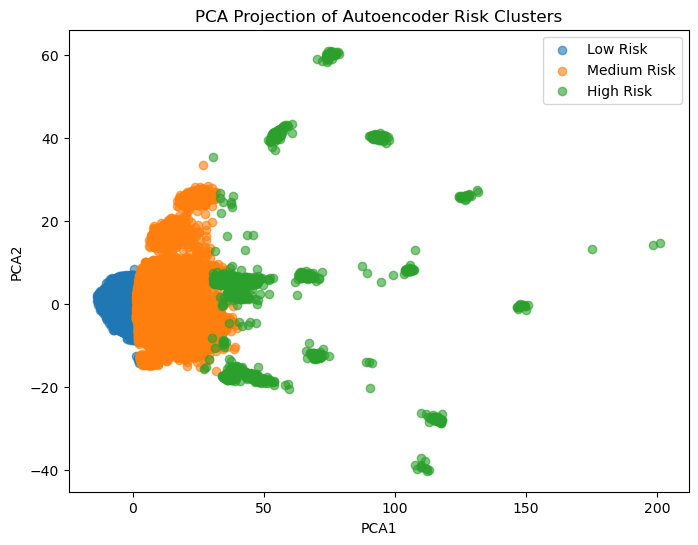

In [10]:
# ============================================================
# STEP 5️⃣: VISUALIZE RISK CLUSTERS (PCA)
# ============================================================

# Reduce 32D encoded features to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_encoded)

encoded_train_df['PCA1'] = pca_result[:, 0]
encoded_train_df['PCA2'] = pca_result[:, 1]

# Plot clusters
plt.figure(figsize=(8, 6))
for level in encoded_train_df['Risk_Level'].unique():
    subset = encoded_train_df[encoded_train_df['Risk_Level'] == level]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=level, alpha=0.6)

plt.title("PCA Projection of Autoencoder Risk Clusters")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()

In [11]:
# ============================================================
# STEP 6️⃣: SAVE RISK-PROFILED DATASET
# ============================================================

encoded_train_df.to_csv("risk_profiled_autoencoder_train.csv", index=False)
print("💾 Saved successfully: risk_profiled_autoencoder_train.csv")

💾 Saved successfully: risk_profiled_autoencoder_train.csv
